In [1]:
import numpy as np
import math
from math import exp
import numpy.linalg as linalg
from sklearn import metrics
import random
from sklearn.datasets import fetch_mldata
import cvxopt
import io
from cvxopt import solvers
from cvxopt.base import matrix as mat
from scipy.spatial.distance import cdist
from pylab import *
%matplotlib inline

In [2]:
filename1 = "iris.data.txt"
r = io.open(filename1, encoding='utf8').readlines()
X = []
Y = []
for i in r[0:150]:
    x = i.split(',')
    X.append(map(float,x[0:len(x)-1]))
    if x[-1] == "Iris-setosa\n":
        Y.append(0)
    elif x[-1] == 'Iris-versicolor\n':
        Y.append(1)
    elif x[-1] == 'Iris-virginica\n':
        Y.append(2)
X = np.array(X)
Y = np.array(Y)

In [3]:
filename2 = "data_banknote_authentication.txt"
r = io.open(filename2, encoding='utf8').readlines()
X1 = []
Y1 = []
for i in r:
    x1 = i.split(',')
    for j in range(0,len(x1)-1):
        try:
            x1[j] = float(x1[j])
        except ValueError:
            x1[j] = 0.0
    X1.append(map(float,x1[0:len(x1)-1]))
    Y1.append(float(x1[-1]))
X1 = np.array(X1)
Y1 = np.array(Y1)

In [4]:
def softGauss(x,y):
    sigma = 0.1
    eud = cdist(x,x,'sqeuclidean')
    ker = np.exp((-1/2)*(eud/sigma**2))
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    c = 1.0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * ker))
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp1 = np.zeros((var, var), float)
    gtemp2 = np.zeros((var, var), float)
    np.fill_diagonal(gtemp1, -1.0)
    np.fill_diagonal(gtemp2, 1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(np.append(gtemp1,gtemp2,axis=0).T))
    print g.size
    h = cvxopt.base.matrix(([0.0] * var + [c] * var))
    m = len(x)
    a = np.reshape((y), (1,m))
    a = a.astype(double)
    a = cvxopt.base.matrix(a)
    b = cvxopt.base.matrix([1.0])
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
        if alpha_val[i] > epsilon and alpha_val[i] < c :
            support_vector.append(x[i])
    support_vector = np.matrix(support_vector)
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[j])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector)
    
    return W, W0, support_vector
    

In [5]:
def softPoly(x,y):
    poly_kernal = []
    for a in range(len(x)):
        list1 = []
        for b in range(len(x)):
            list1.append((np.dot(x[a],x[b])+1)**1)
        poly_kernal.append(list1)
    poly_kernal = np.array(poly_kernal)
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    c = 1.0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * poly_kernal))
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp1 = np.zeros((var, var), float)
    gtemp2 = np.zeros((var, var), float)
    np.fill_diagonal(gtemp1, -1.0)
    np.fill_diagonal(gtemp2, 1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(np.append(gtemp1,gtemp2,axis=0).T))
    print g.size
    h = cvxopt.base.matrix(([0.0] * var + [c] * var))
    m = len(x)
    a = np.reshape((y), (1,m))
    a = a.astype(double)
    a = cvxopt.base.matrix(a)
    b = cvxopt.base.matrix([1.0])
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
        if alpha_val[i] > epsilon and alpha_val[i] < c :
            support_vector.append(x[i])
    support_vector = np.matrix(support_vector)
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[j])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector)
    
    return W, W0, support_vector
    

In [6]:
def predict(x,w,w0):
    predict = []
    for i in range(len(x)):
        var1 = np.dot(w,x[i]) + w0
        if var1 > 0:
            predict.append([1])
        if var1 < 0:
            predict.append([-1])
    return np.array(predict)        

In [7]:
def accuracy(labels,predicted):
    return metrics.accuracy_score(labels, predicted)

In [8]:
W_iris_gauss, W0_iris_gauss, sv_iris_gauss = softGauss(X,Y)

(300, 150)
     pcost       dcost       gap    pres   dres
 0: -7.9430e-02 -1.5174e+02  2e+02  1e-16  4e-16
 1: -1.6878e-01 -4.3796e+00  4e+00  2e-16  4e-16
 2: -1.7989e-01 -2.2737e-01  5e-02  2e-16  2e-16
 3: -1.7997e-01 -1.8045e-01  5e-04  2e-16  2e-16
 4: -1.7997e-01 -1.7997e-01  5e-06  2e-16  2e-16
 5: -1.7997e-01 -1.7997e-01  5e-08  2e-16  2e-16
Optimal solution found.


In [9]:
predict_gauss = predict(X, W_iris_gauss,  W0_iris_gauss)

In [10]:
acc = accuracy(Y,predict_gauss)
print "Accuracy:(gauss;iris)", acc

Accuracy:(gauss;iris) 0.253333333333


In [11]:
W_iris_poly, W0_iris_poly, sv_iris_poly = softPoly(X,Y)

(300, 150)
     pcost       dcost       gap    pres   dres
 0:  2.3722e-04 -1.6239e+02  7e+02  2e+00  4e-12
 1:  5.2500e-03 -5.3444e+01  8e+01  1e-01  4e-12
 2:  6.7835e-02 -1.8854e+01  4e+01  5e-02  4e-12
 3:  1.5293e-01 -9.0818e+00  3e+01  4e-02  5e-12
 4:  6.2712e-01  1.1493e+01  3e+01  3e-02  6e-12
 5:  9.0513e+00  9.3593e+01  3e+01  2e-02  6e-12
 6:  2.8370e+01  1.6791e+02  5e+01  2e-02  5e-12
 7:  7.1094e+01  2.5149e+02  7e+01  2e-02  5e-12
 8:  7.6173e+01  2.6446e+02  7e+01  2e-02  5e-12
 9:  1.3512e+02  3.3544e+02  9e+01  1e-02  5e-12
10:  1.7866e+02  3.8071e+02  1e+02  1e-02  3e-12
11:  1.7749e+02  3.8659e+02  1e+02  1e-02  3e-12
12:  1.8830e+02  4.4534e+02  1e+02  1e-02  4e-12
13:  2.5101e+02  7.6036e+02  1e+02  7e-03  3e-12
14:  1.8923e+03  1.6814e+03  8e+02  2e-03  1e-11
15:  1.7142e+03  1.6980e+03  2e+01  2e-16  1e-11
16:  1.6996e+03  1.6995e+03  2e-01  2e-16  3e-12
17:  1.6995e+03  1.6995e+03  2e-03  2e-16  3e-12
Optimal solution found.


In [12]:
predict_poly = predict(X, W_iris_poly,  W0_iris_poly)

In [13]:
acc_poly = accuracy(Y,predict_poly)
print "Accuracy:(poly;iris)", acc_poly

Accuracy:(poly;iris) 0.253333333333


In [14]:
W_bank_gauss, W0_bank_gauss, sv_bank_gauss = softGauss(X1,Y1)

(2744, 1372)
     pcost       dcost       gap    pres   dres
 0: -4.9564e-01 -1.3783e+03  1e+03  3e-17  3e-16
 1: -1.0220e+00 -1.5471e+01  1e+01  2e-16  4e-16
 2: -1.0816e+00 -1.2525e+00  2e-01  4e-16  2e-16
 3: -1.0820e+00 -1.0837e+00  2e-03  2e-16  1e-16
 4: -1.0820e+00 -1.0820e+00  2e-05  9e-16  1e-16
 5: -1.0820e+00 -1.0820e+00  2e-06  4e-16  1e-16
 6: -1.0820e+00 -1.0820e+00  1e-07  2e-16  1e-16
Optimal solution found.


In [15]:
predict_bank_gauss = predict(X1, W_bank_gauss,  W0_bank_gauss)

In [16]:
acc_bank_gauss = accuracy(Y1,predict_bank_gauss)
print "Accuracy:(bank;gauss)", acc_bank_gauss

Accuracy:(bank;gauss) 0.294460641399


In [17]:
W_bank_poly, W0_bank_poly, sv_bank_poly = softPoly(X1,Y1)

(2744, 1372)
     pcost       dcost       gap    pres   dres
 0:  5.8022e-05 -1.3919e+03  6e+03  1e+00  8e-12
 1:  1.9436e-03 -3.8109e+02  5e+02  3e-02  9e-12
 2:  2.5568e-02 -1.1458e+02  1e+02  9e-03  1e-11
 3:  1.4657e-01 -8.7998e+01  1e+02  8e-03  1e-11
 4:  3.7973e-01 -7.3471e+01  1e+02  7e-03  2e-11
 5:  1.2004e+00 -4.4479e+01  1e+02  5e-03  3e-11
 6:  6.4090e+00  1.0111e+01  9e+01  4e-03  2e-11
 7:  3.9040e+01  1.1084e+02  9e+01  3e-03  2e-11
 8:  7.4149e+01  1.5868e+02  8e+01  2e-03  2e-11
 9:  1.0226e+02  1.8066e+02  9e+01  2e-03  1e-11
10:  1.1738e+02  1.8965e+02  9e+01  1e-03  1e-11
11:  1.6144e+02  2.0386e+02  9e+01  1e-03  1e-11
12:  1.6477e+02  2.0537e+02  9e+01  1e-03  1e-11
13:  1.9073e+02  2.1981e+02  7e+01  7e-04  1e-11
14:  2.0725e+02  2.3670e+02  7e+01  5e-04  8e-12
15:  2.4135e+02  2.6935e+02  6e+01  3e-04  6e-12
16:  2.6867e+02  2.7402e+02  5e+01  2e-04  5e-12
17:  2.7806e+02  2.7848e+02  5e+01  2e-04  4e-12
18:  3.0144e+02  2.9498e+02  2e+01  3e-05  3e-12
19:  3.0

In [18]:
predict_bank_poly = predict(X1, W_bank_poly,  W0_bank_poly)

In [19]:
acc_bank_poly = accuracy(Y1,predict_bank_poly)
print "Accuracy:(bank;poly)", acc_bank_poly

Accuracy:(bank;poly) 0.444606413994


In [20]:
def plotsupportvector(sv,x,y):
    xsv = []
    ysv = []

    sv = np.array(sv)
    for i in range(len(sv)):
        xsv.append(sv[0])
        ysv.append(sv[1])
            
    plt.plot(X,'ro')
    plt.plot(Y,'bo')
    plt.plot(xsv,ysv,'g^')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

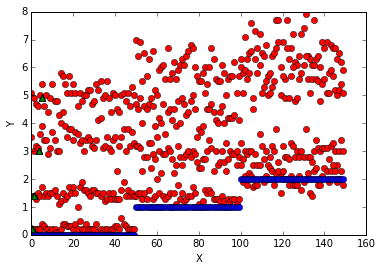

In [21]:
SVplot1 = plotsupportvector(sv_iris_gauss,X,Y)

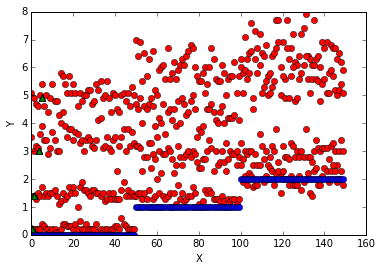

In [22]:
SVplot2 = plotsupportvector(sv_iris_poly,X,Y)

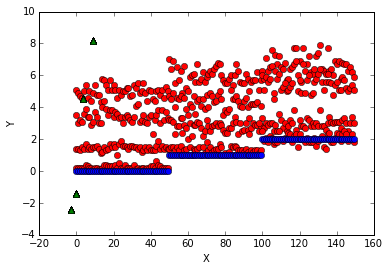

In [23]:
SVplot3 = plotsupportvector(sv_bank_gauss,X1,Y1)

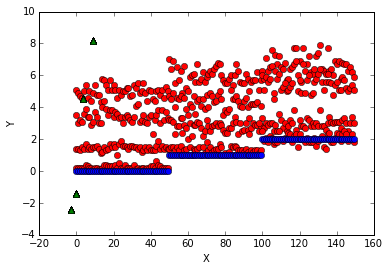

In [24]:
SVplot4 = plotsupportvector(sv_bank_poly,X1,Y1)